In [498]:
!pip install nltk
!pip install -U pandasql
!pip install wordcloud

In [499]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandasql as ps 
import wordcloud 
from wordcloud import WordCloud, STOPWORDS

# STEP 1: Create a single data frame titled "articles_df" by combining the files in the "ARTICLE-INFO" folder

In [500]:
#reading all datasets in article info
articles_df = pd.concat([pd.read_excel(path, parse_dates=['Publication Type']) 
                         for path in glob.glob(r'C:\Users\HP\Documents\sumdaz\Data Manipulation & Processing for Machine Learning\PROJECT\COVID\ARTICLE-INFO/*.xls')])
articles_df.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID)
0,J,"Chevallier, J",NaN,NaN,NaN,"Chevallier, Julien",NaN,NaN,COVID-19 Pandemic and Financial Contagion,JOURNAL OF RISK AND FINANCIAL MANAGEMENT,...,"Business, Finance",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000602134700001
1,C,"Chen, YB; Leung, CK; Shang, SY; Wen, Q",NaN,"Hu, J; Min, G; Georgalas, N; Zhao, Z; Hao, F; ...",NaN,"Chen, Yubo; Leung, Carson K.; Shang, Siyuan; W...",NaN,NaN,Temporal Data Analytics on COVID-19 Data with ...,2020 IEEE INTL SYMP ON PARALLEL & DISTRIBUTED ...,...,"Computer Science, Hardware & Architecture; Com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000684021500120
2,J,"Barot, PA; Jethva, HB",NaN,NaN,NaN,"Barot, Pratikkumar A.; Jethva, Harikrishna B.",NaN,NaN,Mgini - Improved Decision Tree using Minority ...,JOURNAL OF INFORMATION SCIENCE AND ENGINEERING,...,"Computer Science, Information Systems",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000692604600007
3,J,"Cho, HR; Kim, JH; Yoon, HR; Han, YS; Kang, TS;...",NaN,NaN,NaN,"Cho, Hyeong Rae; Kim, Jin Hyun; Yoon, Hye Rin;...",NaN,NaN,Machine learning-based optimization of pre-sym...,SCIENTIFIC REPORTS,...,Multidisciplinary Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000795163100083
4,J,"Zhang, RK; Xiao, Q; Zhu, SL; Lin, HY; Tang, M",NaN,NaN,NaN,"Zhang, Rui-kun; Xiao, Qi; Zhu, Sheng-lang; Lin...",NaN,NaN,Using different machine learning models to cla...,JOURNAL OF MEDICAL VIROLOGY,...,Virology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000698971400001


In [501]:
#checking all the columns in articles_df
articles_df.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

# STEP 2: According to what you have learned from CS 1001-CS 1003 and this course, please clean your "articles_df" data frame.

In [502]:
#which columns will be necessary in my EDA
articles_df = articles_df[['Publication Type', 'Authors','Article Title', 'Source Title','Early Access Date','Author Keywords','Document Type', 
                           'Times Cited, All Databases','Publication Year','Publication Date','WoS Categories','DOI',
                           'Keywords Plus', 'Abstract', 'Cited Reference Count', 'Times Cited, WoS Core', 'Times Cited, All Databases',
                          ]]
articles_df.head()

,Publication Type,Authors,Article Title,Source Title,Early Access Date,Author Keywords,Document Type,"Times Cited, All Databases",Publication Year,Publication Date,WoS Categories,DOI,Keywords Plus,Abstract,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases"
0,J,"Chevallier, J",COVID-19 Pandemic and Financial Contagion,JOURNAL OF RISK AND FINANCIAL MANAGEMENT,NaN,Covid-19; financial contagion; Johns Hopkins r...,Article,13,2020.0,DEC,"Business, Finance",10.3390/jrfm13120309,NaN,The original contribution of this paper is to ...,35,13,13
1,C,"Chen, YB; Leung, CK; Shang, SY; Wen, Q",Temporal Data Analytics on COVID-19 Data with ...,2020 IEEE INTL SYMP ON PARALLEL & DISTRIBUTED ...,NaN,data science; coronavirus disease; COVID-19; b...,Proceedings Paper,5,2020.0,NaN,"Computer Science, Hardware & Architecture; Com...",10.1109/ISPA-BDCloud-SocialCom-SustainCom51426...,EDITORIAL SPECIAL-ISSUE; BIG DATA; DIAGNOSIS,With technological advancements in computing a...,61,5,5
2,J,"Barot, PA; Jethva, HB",Mgini - Improved Decision Tree using Minority ...,JOURNAL OF INFORMATION SCIENCE AND ENGINEERING,NaN,COVID-19; imbalanced data; CART; Mgini index; ...,Article,0,2021.0,SEP,"Computer Science, Information Systems",10.6688/JISE.202109_37(5).0008,NaN,"In the time of COVID-19, medical facilities st...",16,0,0
3,J,"Cho, HR; Kim, JH; Yoon, HR; Han, YS; Kang, TS;...",Machine learning-based optimization of pre-sym...,SCIENTIFIC REPORTS,NaN,NaN,Article,0,2022.0,MAY 12,Multidisciplinary Sciences,10.1038/s41598-022-11329-y,NaN,Patients with weak or no symptoms accelerate t...,23,0,0
4,J,"Zhang, RK; Xiao, Q; Zhu, SL; Lin, HY; Tang, M",Using different machine learning models to cla...,JOURNAL OF MEDICAL VIROLOGY,SEP 2021,artificial intelligence; biostatistics & bioin...,Article,0,2022.0,JAN,Virology,10.1002/jmv.27352,NaN,COVID-19 is a serious respiratory disease. The...,38,0,0


In [503]:
#to show the null values of the new articles_df
articles_df.isna().sum()

Publication Type                 0
Authors                          0
Article Title                    0
Source Title                     0
Early Access Date             3020
Author Keywords                669
Document Type                    0
Times Cited, All Databases       0
Publication Year               261
Publication Date              1173
WoS Categories                   6
DOI                            165
Keywords Plus                 1492
Abstract                       108
Cited Reference Count            0
Times Cited, WoS Core            0
Times Cited, All Databases       0
dtype: int64

In [504]:
#checking for unique values across the columns
articles_df.nunique()

Publication Type                 4
Authors                       4001
Article Title                 4056
Source Title                  1527
Early Access Date               28
Author Keywords               3387
Document Type                   16
Times Cited, All Databases     124
Publication Year                 3
Publication Date               346
WoS Categories                 621
DOI                           3896
Keywords Plus                 2263
Abstract                      3952
Cited Reference Count          214
Times Cited, WoS Core          125
Times Cited, All Databases     124
dtype: int64

In [505]:
#checking the shape of the new articles_df
articles_df.shape

(4064, 17)

In [506]:
#rechecking the new columns
articles_df.columns

Index(['Publication Type', 'Authors', 'Article Title', 'Source Title',
       'Early Access Date', 'Author Keywords', 'Document Type',
       'Times Cited, All Databases', 'Publication Year', 'Publication Date',
       'WoS Categories', 'DOI', 'Keywords Plus', 'Abstract',
       'Cited Reference Count', 'Times Cited, WoS Core',
       'Times Cited, All Databases'],
      dtype='object')

In [507]:
# to Check for duplicates in the |dataFrame
articles_df.duplicated().sum()

0

In [508]:
#checking for a duplication of any article 
articles_df.duplicated(subset=['Article Title']).any()

True

In [509]:
#to show the number of the duplicated articles
articles_df[articles_df.duplicated(subset=['Article Title'])==True]['Article Title'].count()

8

In [510]:
#to show the duplicated articles
articles_df[articles_df.duplicated(subset=['Article Title'])==True]['Article Title']

558    Recent Development of Crowd Monitoring Technol...
599    Machine learning for prediction of in-hospital...
19     Using Machine Learning to Generate Novel Hypot...
132    COVID-19 and the flu: data simulations and com...
177    Quantifying asymptomatic infection and transmi...
106    Symptom Prediction and Mortality Risk Calculat...
458    Machine learning-based Analysis of COVID-19 Pa...
958    A Survey of the Application of Artifical Intel...
Name: Article Title, dtype: object

In [511]:
#to show the number of duplicated DOI
articles_df['DOI'].duplicated().sum()

167

In [512]:
#to convert the Early Access Date to datetime
#articles_df['Early Access Date']= pd.to_datetime(articles_df['Early Access Date'])

In [513]:
#to check if the Early Access Date has been changed to datetime
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4064 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            4064 non-null   object 
 1   Authors                     4064 non-null   object 
 2   Article Title               4064 non-null   object 
 3   Source Title                4064 non-null   object 
 4   Early Access Date           1044 non-null   object 
 5   Author Keywords             3395 non-null   object 
 6   Document Type               4064 non-null   object 
 7   Times Cited, All Databases  4064 non-null   int64  
 8   Publication Year            3803 non-null   float64
 9   Publication Date            2891 non-null   object 
 10  WoS Categories              4058 non-null   object 
 11  DOI                         3899 non-null   object 
 12  Keywords Plus               2572 non-null   object 
 13  Abstract                    3956 n

In [514]:
#to filter out the year out from the datetime column of Early Access Date
#articles_df['Early Access Date']= articles_df['Early Access Date'].dt.year

# STEP 3: After cleaning and selecting the important features, fill nan values with an appropriate strategy.

Publication year, Publication Date and Early Access Date are all connected:

i. Using the years in Early Access Date to fill the NaN values of Publication and

ii. Using the years of Publication Year to fill the Publication Date

In [515]:
#to convert the Early Access Date to datetime
articles_df['Early Access Date']= pd.to_datetime(articles_df['Early Access Date'])

In [516]:
#to filter out the year out from the datetime column of Early Access Date
articles_df['Early Access Date']= articles_df['Early Access Date'].dt.year

In [517]:
#filling the NaN in 'Publication Year' with the correspodning 'Early Access Date' values
articles_df['Publication Year']=articles_df['Publication Year'].fillna(articles_df['Early Access Date'])

In [518]:
articles_df.sample(5)

,Publication Type,Authors,Article Title,Source Title,Early Access Date,Author Keywords,Document Type,"Times Cited, All Databases",Publication Year,Publication Date,WoS Categories,DOI,Keywords Plus,Abstract,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases"
327,C,"Moreira, MAL; Gomes, CFS; dos Santos, M; da Si...",Sensitivity Analysis by the PROMETHEE-GAIA met...,8TH INTERNATIONAL CONFERENCE ON INFORMATION TE...,NaN,Predicition Algorithms; COVID-19; Multiple Cri...,Proceedings Paper,0,2022.0,NaN,"Computer Science, Information Systems; Compute...",10.1016/j.procs.2022.01.052,NaN,With the expansion of coronavirus in the World...,20,0,0
980,J,"Al-Jaroodi, J; Mohamed, N; Abukhousa, E",Health 4.0: On the Way to Realizing the Health...,IEEE ACCESS,NaN,Medical services; Industries; Middleware; Clou...,Article,6,2020.0,NaN,"Computer Science, Information Systems; Enginee...",10.1109/ACCESS.2020.3038858,CONTEXT AWARENESS; PRIVACY ISSUES; MIDDLEWARE;...,Health 4.0 establishes a new promising vision ...,93,6,6
789,J,"Laroia, G; Horne, BD; Esplin, S; Ramaswamy, VK",A unified health algorithm that teaches itself...,DIGITAL HEALTH,NaN,Artificial intelligence; digital health; behav...,Article,0,2022.0,JAN,Health Care Sciences & Services; Health Policy...,10.1177/20552076221074126,NaN,The single biggest factor driving health outco...,17,0,0
456,J,"Serte, S; Dirik, MA; Al-Turjman, F",Deep Learning Models for COVID-19 Detection,SUSTAINABILITY,NaN,convolutional neural networks; deep learning; ...,Article,0,2022.0,MAY,Green & Sustainable Science & Technology; Envi...,10.3390/su14105820,NaN,Healthcare is one of the crucial aspects of th...,35,0,0
692,J,"Imami, AS; McCullumsmith, RE; O'Donovan, SM",Strategies to identify candidate repurposable ...,TRANSLATIONAL PSYCHIATRY,NaN,NaN,Review,1,2021.0,NOV 16,Psychiatry,10.1038/s41398-021-01724-w,KINASE INHIBITORS; CONNECTIVITY MAP; CLINICAL-...,Drug repurposing is an invaluable strategy to ...,107,1,1


In [519]:
articles_df.isnull().sum()

Publication Type                 0
Authors                          0
Article Title                    0
Source Title                     0
Early Access Date             3020
Author Keywords                669
Document Type                    0
Times Cited, All Databases       0
Publication Year                 0
Publication Date              1173
WoS Categories                   6
DOI                            165
Keywords Plus                 1492
Abstract                       108
Cited Reference Count            0
Times Cited, WoS Core            0
Times Cited, All Databases       0
dtype: int64

In [520]:
#filliong the NaN values in Publication Date with the corresponding Publication Year
articles_df['Publication Date']=articles_df['Publication Date'].fillna(articles_df['Publication Year'])

In [521]:
articles_df.sample(5)

,Publication Type,Authors,Article Title,Source Title,Early Access Date,Author Keywords,Document Type,"Times Cited, All Databases",Publication Year,Publication Date,WoS Categories,DOI,Keywords Plus,Abstract,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases"
144,J,"Jomthanachai, S; Wong, WP; Lim, CP",An Application of Data Envelopment Analysis an...,IEEE ACCESS,NaN,Risk management; Monitoring; Computational mod...,Article,1,2021.0,2021.0,"Computer Science, Information Systems; Enginee...",10.1109/ACCESS.2021.3087623,CROSS-EFFICIENCY EVALUATION; FAILURE MODE; SUP...,An integrated method comprising DEA and machin...,67,1,1
374,J,"Niesen, MJM; Pawlowski, C; O'Horo, JC; Challen...",Surveillance of Safety of 3 Doses of COVID-19 ...,JAMA NETWORK OPEN,NaN,NaN,Article,0,2022.0,APR 14,"Medicine, General & Internal",10.1001/jamanetworkopen.2022.7038,NaN,IMPORTANCE Recent reports on waning of COVID-1...,33,0,0
869,J,"Ali, AM; Kunugi, H; Abdelmageed, HA; Mandour, ...",Vitamin K in COVID-19-Potential Anti-COVID-19 ...,FERMENTATION-BASEL,NaN,vitamin K; phylloquinone; menaquinones; Corona...,Article,4,2021.0,DEC,Biotechnology & Applied Microbiology; Food Sci...,10.3390/fermentation7040202,MATRIX GLA-PROTEIN; CORONARY-ARTERY CALCIUM; M...,Vitamin K deficiency is evident in severe and ...,152,4,4
405,C,"Tang, C",Discovering Unknown Diseases with Explainable ...,MEDICAL IMAGE UNDERSTANDING AND ANALYSIS,NaN,New/unknown disease discovery; DNN confidence ...,Proceedings Paper,1,2020.0,2020.0,"Computer Science, Artificial Intelligence; Ima...",10.1007/978-3-030-52791-4_27,NaN,Deep neural network (DNN) classifiers have att...,11,1,1
14,J,"Debnath, R; Bardhan, R; Misra, A; Hong, TZ; Ro...",<p>Lockdown impacts on residential electricity...,ENERGY POLICY,NaN,COVID-19; Work-from-home; NILM; Machine learni...,Article,0,2022.0,MAY,Economics; Energy & Fuels; Environmental Scien...,10.1016/j.enpol.2022.112886,ENERGY MANAGEMENT; ALGORITHM,This study evaluates the effect of complete na...,68,0,0


In [522]:
articles_df.isnull().sum()

Publication Type                 0
Authors                          0
Article Title                    0
Source Title                     0
Early Access Date             3020
Author Keywords                669
Document Type                    0
Times Cited, All Databases       0
Publication Year                 0
Publication Date                 0
WoS Categories                   6
DOI                            165
Keywords Plus                 1492
Abstract                       108
Cited Reference Count            0
Times Cited, WoS Core            0
Times Cited, All Databases       0
dtype: int64

In [523]:
#filling the NaN in 'Author Keyword with the correspodning 'Keywords Plus' values
articles_df['Author Keywords']=articles_df['Author Keywords'].fillna(articles_df['Keywords Plus'])

In [524]:
articles_df.head()

,Publication Type,Authors,Article Title,Source Title,Early Access Date,Author Keywords,Document Type,"Times Cited, All Databases",Publication Year,Publication Date,WoS Categories,DOI,Keywords Plus,Abstract,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases"
0,J,"Chevallier, J",COVID-19 Pandemic and Financial Contagion,JOURNAL OF RISK AND FINANCIAL MANAGEMENT,NaN,Covid-19; financial contagion; Johns Hopkins r...,Article,13,2020.0,DEC,"Business, Finance",10.3390/jrfm13120309,NaN,The original contribution of this paper is to ...,35,13,13
1,C,"Chen, YB; Leung, CK; Shang, SY; Wen, Q",Temporal Data Analytics on COVID-19 Data with ...,2020 IEEE INTL SYMP ON PARALLEL & DISTRIBUTED ...,NaN,data science; coronavirus disease; COVID-19; b...,Proceedings Paper,5,2020.0,2020.0,"Computer Science, Hardware & Architecture; Com...",10.1109/ISPA-BDCloud-SocialCom-SustainCom51426...,EDITORIAL SPECIAL-ISSUE; BIG DATA; DIAGNOSIS,With technological advancements in computing a...,61,5,5
2,J,"Barot, PA; Jethva, HB",Mgini - Improved Decision Tree using Minority ...,JOURNAL OF INFORMATION SCIENCE AND ENGINEERING,NaN,COVID-19; imbalanced data; CART; Mgini index; ...,Article,0,2021.0,SEP,"Computer Science, Information Systems",10.6688/JISE.202109_37(5).0008,NaN,"In the time of COVID-19, medical facilities st...",16,0,0
3,J,"Cho, HR; Kim, JH; Yoon, HR; Han, YS; Kang, TS;...",Machine learning-based optimization of pre-sym...,SCIENTIFIC REPORTS,NaN,NaN,Article,0,2022.0,MAY 12,Multidisciplinary Sciences,10.1038/s41598-022-11329-y,NaN,Patients with weak or no symptoms accelerate t...,23,0,0
4,J,"Zhang, RK; Xiao, Q; Zhu, SL; Lin, HY; Tang, M",Using different machine learning models to cla...,JOURNAL OF MEDICAL VIROLOGY,2021.0,artificial intelligence; biostatistics & bioin...,Article,0,2022.0,JAN,Virology,10.1002/jmv.27352,NaN,COVID-19 is a serious respiratory disease. The...,38,0,0


In [525]:
#to drop the NaN values in column WoS Categories
articles_df = articles_df.dropna(subset = ['WoS Categories'])
articles_df.head()

,Publication Type,Authors,Article Title,Source Title,Early Access Date,Author Keywords,Document Type,"Times Cited, All Databases",Publication Year,Publication Date,WoS Categories,DOI,Keywords Plus,Abstract,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases"
0,J,"Chevallier, J",COVID-19 Pandemic and Financial Contagion,JOURNAL OF RISK AND FINANCIAL MANAGEMENT,NaN,Covid-19; financial contagion; Johns Hopkins r...,Article,13,2020.0,DEC,"Business, Finance",10.3390/jrfm13120309,NaN,The original contribution of this paper is to ...,35,13,13
1,C,"Chen, YB; Leung, CK; Shang, SY; Wen, Q",Temporal Data Analytics on COVID-19 Data with ...,2020 IEEE INTL SYMP ON PARALLEL & DISTRIBUTED ...,NaN,data science; coronavirus disease; COVID-19; b...,Proceedings Paper,5,2020.0,2020.0,"Computer Science, Hardware & Architecture; Com...",10.1109/ISPA-BDCloud-SocialCom-SustainCom51426...,EDITORIAL SPECIAL-ISSUE; BIG DATA; DIAGNOSIS,With technological advancements in computing a...,61,5,5
2,J,"Barot, PA; Jethva, HB",Mgini - Improved Decision Tree using Minority ...,JOURNAL OF INFORMATION SCIENCE AND ENGINEERING,NaN,COVID-19; imbalanced data; CART; Mgini index; ...,Article,0,2021.0,SEP,"Computer Science, Information Systems",10.6688/JISE.202109_37(5).0008,NaN,"In the time of COVID-19, medical facilities st...",16,0,0
3,J,"Cho, HR; Kim, JH; Yoon, HR; Han, YS; Kang, TS;...",Machine learning-based optimization of pre-sym...,SCIENTIFIC REPORTS,NaN,NaN,Article,0,2022.0,MAY 12,Multidisciplinary Sciences,10.1038/s41598-022-11329-y,NaN,Patients with weak or no symptoms accelerate t...,23,0,0
4,J,"Zhang, RK; Xiao, Q; Zhu, SL; Lin, HY; Tang, M",Using different machine learning models to cla...,JOURNAL OF MEDICAL VIROLOGY,2021.0,artificial intelligence; biostatistics & bioin...,Article,0,2022.0,JAN,Virology,10.1002/jmv.27352,NaN,COVID-19 is a serious respiratory disease. The...,38,0,0


In [526]:
articles_df.isnull().sum()

Publication Type                 0
Authors                          0
Article Title                    0
Source Title                     0
Early Access Date             3014
Author Keywords                269
Document Type                    0
Times Cited, All Databases       0
Publication Year                 0
Publication Date                 0
WoS Categories                   0
DOI                            165
Keywords Plus                 1486
Abstract                       108
Cited Reference Count            0
Times Cited, WoS Core            0
Times Cited, All Databases       0
dtype: int64

In [527]:
#renaming 'Article Title' to 'Title'
articles_df.rename(columns={'Article Title': 'Title'}, inplace=True)
articles_df

,Publication Type,Authors,Title,Source Title,Early Access Date,Author Keywords,Document Type,"Times Cited, All Databases",Publication Year,Publication Date,WoS Categories,DOI,Keywords Plus,Abstract,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases"
0,J,"Chevallier, J",COVID-19 Pandemic and Financial Contagion,JOURNAL OF RISK AND FINANCIAL MANAGEMENT,NaN,Covid-19; financial contagion; Johns Hopkins r...,Article,13,2020.0,DEC,"Business, Finance",10.3390/jrfm13120309,NaN,The original contribution of this paper is to ...,35,13,13
1,C,"Chen, YB; Leung, CK; Shang, SY; Wen, Q",Temporal Data Analytics on COVID-19 Data with ...,2020 IEEE INTL SYMP ON PARALLEL & DISTRIBUTED ...,NaN,data science; coronavirus disease; COVID-19; b...,Proceedings Paper,5,2020.0,2020.0,"Computer Science, Hardware & Architecture; Com...",10.1109/ISPA-BDCloud-SocialCom-SustainCom51426...,EDITORIAL SPECIAL-ISSUE; BIG DATA; DIAGNOSIS,With technological advancements in computing a...,61,5,5
2,J,"Barot, PA; Jethva, HB",Mgini - Improved Decision Tree using Minority ...,JOURNAL OF INFORMATION SCIENCE AND ENGINEERING,NaN,COVID-19; imbalanced data; CART; Mgini index; ...,Article,0,2021.0,SEP,"Computer Science, Information Systems",10.6688/JISE.202109_37(5).0008,NaN,"In the time of COVID-19, medical facilities st...",16,0,0
3,J,"Cho, HR; Kim, JH; Yoon, HR; Han, YS; Kang, TS;...",Machine learning-based optimization of pre-sym...,SCIENTIFIC REPORTS,NaN,NaN,Article,0,2022.0,MAY 12,Multidisciplinary Sciences,10.1038/s41598-022-11329-y,NaN,Patients with weak or no symptoms accelerate t...,23,0,0
4,J,"Zhang, RK; Xiao, Q; Zhu, SL; Lin, HY; Tang, M",Using different machine learning models to cla...,JOURNAL OF MEDICAL VIROLOGY,2021.0,artificial intelligence; biostatistics & bioin...,Article,0,2022.0,JAN,Virology,10.1002/jmv.27352,NaN,COVID-19 is a serious respiratory disease. The...,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,"Bologna, G",Transparent Ensembles for Covid-19 Prognosis,MACHINE LEARNING AND KNOWLEDGE EXTRACTION (CD-...,NaN,Ensembles; Model transparency; Rule extraction...,Proceedings Paper,0,2021.0,2021.0,"Computer Science, Artificial Intelligence; Com...",10.1007/978-3-030-84060-0_22,RULES,A natural method aiming at explaining the answ...,27,0,0
996,J,"Rawindaran, N; Jayal, A; Prakash, E; Hewage, C",Cost Benefits of Using Machine Learning Featur...,FUTURE INTERNET,NaN,network intrusion; intrusion detection; cybers...,Article,2,2021.0,AUG,"Computer Science, Information Systems",10.3390/fi13080186,INTRUSION-DETECTION; INTERNET,Cyber security has made an impact and has chal...,49,2,2
997,J,"Khan, M; Mehran, MT; Ul Haq, Z; Ullah, Z; Naqv...",Applications of artificial intelligence in COV...,EXPERT SYSTEMS WITH APPLICATIONS,2021.0,Artificial intelligence; Machine learning; COV...,Review,10,2021.0,DEC 15,"Computer Science, Artificial Intelligence; Eng...",10.1016/j.eswa.2021.115695,AI; CHALLENGES; CLASSIFICATION; TECHNOLOGIES; ...,During the current global public health emerge...,164,10,10
998,C,"Almalki, KJ; Song, SJ; Mohzary, M; Choi, BY",CATS: Crowd-based Alert and Tracing Services f...,2021 IFIP/IEEE INTERNATIONAL SYMPOSIUM ON INTE...,NaN,COVID-19; Social Distancing; Mask-wearing; Mac...,Proceedings Paper,2,2021.0,2021.0,"Computer Science, Information Systems; Compute...",NaN,NaN,COVID-19 has been causing several pandemic wav...,16,2,2


# STEP 4: Aside from your data frame ("articles_df"), you need to study with the "wos-index" file. You need to score the index. The aim here is to convert the categorical data to numerical form. The file contains It is worth noting that

In [528]:
#to read my wos_index file
wos_index = pd.read_csv('wos-index.csv')
wos_index.sample(5)

,Title,Title20,Country/Region,SCIE,SSCI,AHCI,ESCI
12885,JOURNAL OF SHELLFISH RESEARCH,J SHELLFISH RES,UNITED STATES,X,NaN,NaN,NaN
13293,JOURNAL OF THEORETICAL & COMPUTATIONAL CHEMISTRY,J THEOR COMPUT CHEM,SINGAPORE,X,NaN,NaN,NaN
1475,ANUARIO DE FILOSOFIA DEL DERECHO,ANU FILOS DERECHO,SPAIN,NaN,NaN,NaN,X
14683,MIGRATION LETTERS,MIGR LETT,ENGLAND,NaN,NaN,NaN,X
7597,HASTINGS CENTER REPORT,HASTINGS CENT REP,UNITED STATES,X,X,NaN,NaN


In [529]:
#checking for the dataframe info
wos_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20942 entries, 0 to 20941
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           20942 non-null  object
 1   Title20         20942 non-null  object
 2   Country/Region  20942 non-null  object
 3   SCIE            9509 non-null   object
 4   SSCI            3511 non-null   object
 5   AHCI            1784 non-null   object
 6   ESCI            7275 non-null   object
dtypes: object(7)
memory usage: 1.1+ MB


In [530]:
#checking the shape
wos_index.shape

(20942, 7)

In [531]:
#checking for unique values
wos_index.nunique()

Title             20942
Title20           20942
Country/Region      115
SCIE                  1
SSCI                  1
AHCI                  1
ESCI                  1
dtype: int64

In [532]:
# getting the number counts of each of the journals that are indexed in each database,
#since each journal is marked X, hence we sum the counts of X in each column
ahci = (wos_index['AHCI'] == 'X').sum()
ssci = (wos_index['SSCI'] == 'X').sum()
scie = (wos_index['SCIE'] == 'X').sum()
esci = (wos_index['ESCI'] == 'X').sum()

print('Total number of', ahci, 'journals were indexed by Arts & Humanities Citation Index (AHCI)')
print('\n')
print('Total number of', ssci, 'journals were indexed by Social Sciences Citation Index (SSCI)')
print('\n')
print('Total number of', scie, 'journals were indexed by Science Citation Index Expanded (SCIE)')
print('\n')
print('Total number of', esci, 'journals were indexed by Emerging Sources Citation Index (ESCI)')

Total number of 1784 journals were indexed by Arts & Humanities Citation Index (AHCI)


Total number of 3511 journals were indexed by Social Sciences Citation Index (SSCI)


Total number of 9509 journals were indexed by Science Citation Index Expanded (SCIE)


Total number of 7275 journals were indexed by Emerging Sources Citation Index (ESCI)


In [533]:
#to check the country with highest journals
country_journals = wos_index.groupby('Country/Region').size().reset_index(name='Count')
country_journals.sort_values(by = 'Count', ascending = False)

,Country/Region,Count
107,UNITED STATES,5833
28,ENGLAND,4424
68,NETHERLANDS,1283
33,GERMANY,1115
94,SPAIN,719
...,...,...
34,GHANA,1
27,EL SALVADOR,1
22,CYPRUS,1
7,BAHRAIN,1


In [534]:
#checking the number of journals by my country Nigeria
country_journals[country_journals['Country/Region']=='NIGERIA']

,Country/Region,Count
71,NIGERIA,6


In [535]:
#to add another column called Rating and setting it to zero
wos_index['Rating'] = 0
wos_index

,Title,Title20,Country/Region,SCIE,SSCI,AHCI,ESCI,Rating
0,2D MATERIALS,2D MATER,ENGLAND,X,NaN,NaN,NaN,0
1,3 BIOTECH,3 BIOTECH,GERMANY,X,NaN,NaN,NaN,0
2,3C EMPRESA,3C EMPRESA,SPAIN,NaN,NaN,NaN,X,0
3,3C TECNOLOGIA,3C TECNOL,SPAIN,NaN,NaN,NaN,X,0
4,3C TIC,3C TIC,SPAIN,NaN,NaN,NaN,X,0
...,...,...,...,...,...,...,...,...
20937,ZOOTAXA,ZOOTAXA,NEW ZEALAND,X,NaN,NaN,NaN,0
20938,ZUCHTUNGSKUNDE,ZUCHTUNGSKUNDE,GERMANY,X,NaN,NaN,NaN,0
20939,ZUTOT,ZUTOT,NETHERLANDS,NaN,NaN,NaN,X,0
20940,ZYGON,ZYGON,UNITED STATES,NaN,X,X,NaN,0


In [536]:
#let me define the score system, let AHCI = SSCI = SCIE = 5 > ESCI = 3
Ratings = {'AHCI': 5, 'SSCI':5, 'SCIE' : 5, 'ESCI': 3}
#writing a for loop to iterate through columns with the string 'X'
for col, Rating in Ratings.items():
    wos_index.loc[wos_index[col] == 'X', 'Rating'] = Rating

#returning new dataframe
wos_index = wos_index[['Title','Rating', 'SCIE', 'SSCI','AHCI', 'ESCI']]
wos_index.sample(10)

,Title,Rating,SCIE,SSCI,AHCI,ESCI
443,ADVANCED PHARMACEUTICAL BULLETIN,3,NaN,NaN,NaN,X
2194,AUSTRALIAN ECONOMIC HISTORY REVIEW,5,NaN,X,NaN,NaN
3551,CHELONIAN CONSERVATION AND BIOLOGY,5,X,NaN,NaN,NaN
12766,JOURNAL OF RELIGION & HEALTH,5,NaN,X,X,NaN
18857,SLEEP MEDICINE CLINICS,3,NaN,NaN,NaN,X
16628,POLISH JOURNAL OF MANAGEMENT STUDIES,3,NaN,NaN,NaN,X
9070,INTERNATIONAL JOURNAL OF ENERGY AND ENVIRONMEN...,3,NaN,NaN,NaN,X
3448,CELL ADHESION & MIGRATION,5,X,NaN,NaN,NaN
3667,CHINA AGRICULTURAL ECONOMIC REVIEW,5,X,X,NaN,NaN
10969,JOURNAL OF CRUSTACEAN BIOLOGY,5,X,NaN,NaN,NaN


In [537]:
#to use the values of Rating to fill X in all columns
wos_index.SCIE[wos_index.SCIE == 'X'] = wos_index['Rating']
wos_index.SSCI[wos_index.SSCI == 'X'] = wos_index['Rating']
wos_index.AHCI[wos_index.AHCI == 'X'] = wos_index['Rating']
wos_index.ESCI[wos_index.ESCI == 'X'] = wos_index['Rating']
wos_index.sample(10)

,Title,Rating,SCIE,SSCI,AHCI,ESCI
15298,NEUROPSYCHIATRIE,3,NaN,NaN,NaN,3
7706,HEMODIALYSIS INTERNATIONAL,5,5,NaN,NaN,NaN
3878,CLINICAL AND EXPERIMENTAL NEPHROLOGY,5,5,NaN,NaN,NaN
369,ACTUALITE ECONOMIQUE,3,NaN,NaN,NaN,3
15833,OPUSCULA MATHEMATICA,3,NaN,NaN,NaN,3
19866,THYROID RESEARCH,3,NaN,NaN,NaN,3
17094,PSYCHOLOGIST-MANAGER JOURNAL,3,NaN,NaN,NaN,3
12541,JOURNAL OF PHOTOCHEMISTRY AND PHOTOBIOLOGY C-P...,5,5,NaN,NaN,NaN
5664,EKONOMIKA I MATEMATICESKIE METODY-ECONOMICS AN...,3,NaN,NaN,NaN,3
9612,INTERNATIONAL JOURNAL OF SURGICAL PATHOLOGY,5,5,NaN,NaN,NaN


In [538]:
#replacing all the NaN values with 0
wos_index.fillna(0)

,Title,Rating,SCIE,SSCI,AHCI,ESCI
0,2D MATERIALS,5,5,0,0,0
1,3 BIOTECH,5,5,0,0,0
2,3C EMPRESA,3,0,0,0,3
3,3C TECNOLOGIA,3,0,0,0,3
4,3C TIC,3,0,0,0,3
...,...,...,...,...,...,...
20937,ZOOTAXA,5,5,0,0,0
20938,ZUCHTUNGSKUNDE,5,5,0,0,0
20939,ZUTOT,3,0,0,0,3
20940,ZYGON,5,0,5,5,0


In [539]:
# define MinMaxScaler
#trans = MinMaxScaler()
# transform data
#rated = trans.fit_transform(wos_index[['Rating', 'SCIE', 'SSCI','AHCI', 'ESCI']])
#wos_index[['Rating', 'SCIE', 'SSCI','AHCI', 'ESCI']] = rated

# STEP 5: Time to understand the "scopus_2022_CiteScore" for contributing different score(s) for the journal. To do so, see the relation between the columns. Please just do a quick search to see the relation between columns:

In [540]:
scopus_2022_CiteScore = pd.read_csv('scopus_2022_CiteScore.csv', sep =';')
scopus_2022_CiteScore.head(5)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2021),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","56,204",Q1,182,41,121,4006,17959,78,"186,75","97,71",United States,Northern America,Wiley-Blackwell,1950-2021,Hematology (Q1); Oncology (Q1)
1,2,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","33,213",Q1,452,111,338,9025,13797,161,"38,55","81,31",United Kingdom,Western Europe,Nature Publishing Group,2000-2021,Cell Biology (Q1); Molecular Biology (Q1)
2,3,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","31,348",Q1,272,48,111,3406,2241,110,"16,30","70,96",United Kingdom,Western Europe,Oxford University Press,1886-2021,Economics and Econometrics (Q1)
3,4,18434,Cell,journal,"00928674, 10974172","25,716",Q1,814,517,1727,33658,73240,1639,"45,00","65,10",United States,Northern America,Cell Press,1974-2021,"Biochemistry, Genetics and Molecular Biology (..."
4,5,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","25,045",Q1,148,124,17,2900,663,17,"33,79","23,39",United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2021,Epidemiology (Q1); Health Information Manageme...


In [541]:
scopus_2022_CiteScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27339 entries, 0 to 27338
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    27339 non-null  int64 
 1   Sourceid                27339 non-null  int64 
 2   Title                   27339 non-null  object
 3   Type                    27339 non-null  object
 4   Issn                    27339 non-null  object
 5   SJR                     26893 non-null  object
 6   SJR Best Quartile       27339 non-null  object
 7   H index                 27339 non-null  int64 
 8   Total Docs. (2021)      27339 non-null  int64 
 9   Total Docs. (3years)    27339 non-null  int64 
 10  Total Refs.             27339 non-null  int64 
 11  Total Cites (3years)    27339 non-null  int64 
 12  Citable Docs. (3years)  27339 non-null  int64 
 13  Cites / Doc. (2years)   27339 non-null  object
 14  Ref. / Doc.             27339 non-null  object
 15  Co

In [542]:
scopus_2022_CiteScore.shape

(27339, 20)

In [543]:
scopus_2022_CiteScore.columns

Index(['Rank', 'Sourceid', 'Title', 'Type', 'Issn', 'SJR', 'SJR Best Quartile',
       'H index', 'Total Docs. (2021)', 'Total Docs. (3years)', 'Total Refs.',
       'Total Cites (3years)', 'Citable Docs. (3years)',
       'Cites / Doc. (2years)', 'Ref. / Doc.', 'Country', 'Region',
       'Publisher', 'Coverage', 'Categories'],
      dtype='object')

# quartile information (column written as SJR Best - here also Q1 means best. In the form of Q1> Q2> Q3> Q4) Scientific Journal Ranking (SJR column).

In [544]:
#to check if there are NaN values in the SJR Best column
scopus_2022_CiteScore.isnull().sum()

Rank                        0
Sourceid                    0
Title                       0
Type                        0
Issn                        0
SJR                       446
SJR Best Quartile           0
H index                     0
Total Docs. (2021)          0
Total Docs. (3years)        0
Total Refs.                 0
Total Cites (3years)        0
Citable Docs. (3years)      0
Cites / Doc. (2years)       0
Ref. / Doc.                 0
Country                     0
Region                      0
Publisher                 340
Coverage                    0
Categories                  0
dtype: int64

In [545]:
#since there are no NaN in the SJR Best column, meaning that all jorunals here have quartile rating
#using the scale of 4 to 1 in scaling SJR Best Quartile, Q1 is the best/highest scale
scaling  = {'Q4': 1, 'Q3': 2, 'Q2': 3, 'Q1' : 4}
scopus_2022_CiteScore['SJR Best Quartile'] = scopus_2022_CiteScore['SJR Best Quartile'].map(scaling)
scopus_2022_CiteScore.sample(10)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2021),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories
4134,4135,25810,Cellulose,journal,09690239,"0,997",4.0,132,762,1947,40911,11555,1942,"5,93","53,69",Netherlands,Western Europe,Springer Netherlands,1994-2021,Polymers and Plastics (Q1)
18750,18751,12927,Ortopedia Traumatologia Rehabilitacja,journal,"20844336, 15093492","0,196",2.0,24,34,144,494,87,142,"0,56","14,53",Poland,Eastern Europe,Agencja Wydawnicza Medsportpress,2002-2021,Rehabilitation (Q3); Orthopedics and Sports Me...
1318,1319,18556,Journal of Cell Science,journal,"14779137, 00219533","1,936",4.0,289,498,1405,30327,6129,1229,"4,15","60,90",United Kingdom,Western Europe,Company of Biologists Ltd,1966-2022,Cell Biology (Q1)
26599,26600,5000159103,EngineerIT,trade journal,19915047,"0,100",1.0,3,0,86,0,0,82,"0,00","0,00",South Africa,Africa,South African Institute of Electrical Engineers,"2006-2016, 2018-2019",Electrical and Electronic Engineering (Q4); In...
26719,26720,5700177271,Matatu,journal,09329714,"0,100",1.0,4,14,111,324,3,102,"0,03","23,14",Netherlands,Western Europe,Brill Academic Publishers,"2011-2017, 2019-2020",Cultural Studies (Q4); History (Q4); Literatur...
7292,7293,32845,American Anthropologist,journal,"00027294, 15481433","0,665",4.0,92,95,341,4358,497,200,"1,66","45,87",United States,Northern America,Wiley-Blackwell,"1888-1959, 1961, 1963, 1965-1966, 1970-2021",Anthropology (Q1); Arts and Humanities (miscel...
994,995,50032,Journal of Neuroinflammation,journal,17422094,"2,286",4.0,126,306,989,20167,9490,988,"9,16","65,91",United Kingdom,Western Europe,BioMed Central Ltd.,2004-2021,Cellular and Molecular Neuroscience (Q1); Immu...
26053,26054,16400154754,Infini,journal,0754023X,"0,101",1.0,1,0,39,0,0,35,"0,00","0,00",France,Western Europe,Gallimard,"2002, 2004-2019",Literature and Literary Theory (Q4)
27056,27057,21101057379,International Comparative Jurisprudence,journal,23516674,NaN,NaN,0,8,0,485,0,0,"0,00","60,63",Lithuania,Eastern Europe,Mykolo Romerio Universitetas,2021,Law
19363,19364,21100201313,Mathematical and Computational Forestry and Na...,journal,19467664,"0,184",1.0,12,8,19,183,9,19,"0,47","22,88",United States,Northern America,NaN,2009-2021,Applied Mathematics (Q4); Computer Science App...


# Total number of documents: Total number of documents

In [546]:
#total number of documents can be gotten from the summation of the document containing columns 
scopus_2022_CiteScore['Total number of documents'] = scopus_2022_CiteScore['Total Docs. (2021)'] + scopus_2022_CiteScore['Total Docs. (3years)']
scopus_2022_CiteScore.head(5)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2021),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Total number of documents
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","56,204",4.0,182,41,121,...,17959,78,"186,75","97,71",United States,Northern America,Wiley-Blackwell,1950-2021,Hematology (Q1); Oncology (Q1),162
1,2,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","33,213",4.0,452,111,338,...,13797,161,"38,55","81,31",United Kingdom,Western Europe,Nature Publishing Group,2000-2021,Cell Biology (Q1); Molecular Biology (Q1),449
2,3,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","31,348",4.0,272,48,111,...,2241,110,"16,30","70,96",United Kingdom,Western Europe,Oxford University Press,1886-2021,Economics and Econometrics (Q1),159
3,4,18434,Cell,journal,"00928674, 10974172","25,716",4.0,814,517,1727,...,73240,1639,"45,00","65,10",United States,Northern America,Cell Press,1974-2021,"Biochemistry, Genetics and Molecular Biology (...",2244
4,5,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","25,045",4.0,148,124,17,...,663,17,"33,79","23,39",United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2021,Epidemiology (Q1); Health Information Manageme...,141


column called Total Number of documents has been added to the original dataframe

# Total References: Includes bibliographic references in the Journal during the selected period

In [547]:
#the column with the selected period is column 'Cites / Doc. (2years)' and it needs to be cleaned
scopus_2022_CiteScore['Cites / Doc. (2years)'] = scopus_2022_CiteScore['Cites / Doc. (2years)'].str.replace(',', '')
scopus_2022_CiteScore.head(5)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2021),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Total number of documents
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","56,204",4.0,182,41,121,...,17959,78,18675,"97,71",United States,Northern America,Wiley-Blackwell,1950-2021,Hematology (Q1); Oncology (Q1),162
1,2,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","33,213",4.0,452,111,338,...,13797,161,3855,"81,31",United Kingdom,Western Europe,Nature Publishing Group,2000-2021,Cell Biology (Q1); Molecular Biology (Q1),449
2,3,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","31,348",4.0,272,48,111,...,2241,110,1630,"70,96",United Kingdom,Western Europe,Oxford University Press,1886-2021,Economics and Econometrics (Q1),159
3,4,18434,Cell,journal,"00928674, 10974172","25,716",4.0,814,517,1727,...,73240,1639,4500,"65,10",United States,Northern America,Cell Press,1974-2021,"Biochemistry, Genetics and Molecular Biology (...",2244
4,5,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","25,045",4.0,148,124,17,...,663,17,3379,"23,39",United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2021,Epidemiology (Q1); Health Information Manageme...,141


In [548]:
#cleaning  'Ref. / Doc.' also
scopus_2022_CiteScore['Ref. / Doc.'] = scopus_2022_CiteScore['Ref. / Doc.'].str.replace(',', '')
scopus_2022_CiteScore.head(5)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2021),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Total number of documents
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","56,204",4.0,182,41,121,...,17959,78,18675,9771,United States,Northern America,Wiley-Blackwell,1950-2021,Hematology (Q1); Oncology (Q1),162
1,2,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","33,213",4.0,452,111,338,...,13797,161,3855,8131,United Kingdom,Western Europe,Nature Publishing Group,2000-2021,Cell Biology (Q1); Molecular Biology (Q1),449
2,3,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","31,348",4.0,272,48,111,...,2241,110,1630,7096,United Kingdom,Western Europe,Oxford University Press,1886-2021,Economics and Econometrics (Q1),159
3,4,18434,Cell,journal,"00928674, 10974172","25,716",4.0,814,517,1727,...,73240,1639,4500,6510,United States,Northern America,Cell Press,1974-2021,"Biochemistry, Genetics and Molecular Biology (...",2244
4,5,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","25,045",4.0,148,124,17,...,663,17,3379,2339,United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2021,Epidemiology (Q1); Health Information Manageme...,141


In [549]:
scopus_2022_CiteScore.columns

Index(['Rank', 'Sourceid', 'Title', 'Type', 'Issn', 'SJR', 'SJR Best Quartile',
       'H index', 'Total Docs. (2021)', 'Total Docs. (3years)', 'Total Refs.',
       'Total Cites (3years)', 'Citable Docs. (3years)',
       'Cites / Doc. (2years)', 'Ref. / Doc.', 'Country', 'Region',
       'Publisher', 'Coverage', 'Categories', 'Total number of documents'],
      dtype='object')

# Cites/ doc: Average number of citations per document

In [550]:
Cites_per_Doc = scopus_2022_CiteScore.groupby(['Cites / Doc. (2years)']).size().reset_index(name='Counts')
Cites_per_Doc.sample(5)

,Cites / Doc. (2years),Counts
428,1606,1
672,296,34
1337,968,1
1315,938,1
1180,777,1


# Total Citations: The number of citations received in the selected year for the documents published in the previous 3 years by a journal, that is, the citations received in the year X for the documents published in the years X-1, X-2, X-3

In [551]:
# define MinMaxScaler
trans = MinMaxScaler()
# transform data
scaled = trans.fit_transform(scopus_2022_CiteScore[['Total Docs. (3years)','Total Refs.','Cites / Doc. (2years)',
                                                     'Total number of documents']])
scopus_2022_CiteScore[['Total Docs. (3years)','Total Refs.','Cites / Doc. (2years)','Total number of documents']] = scaled

#https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [552]:
scopus_2022_CiteScore.head(5)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2021),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Total number of documents
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","56,204",4.0,182,41,0.001811,...,17959,78,1.000000,9771,United States,Northern America,Wiley-Blackwell,1950-2021,Hematology (Q1); Oncology (Q1),0.001618
1,2,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","33,213",4.0,452,111,0.005059,...,13797,161,0.206426,8131,United Kingdom,Western Europe,Nature Publishing Group,2000-2021,Cell Biology (Q1); Molecular Biology (Q1),0.004502
2,3,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","31,348",4.0,272,48,0.001661,...,2241,110,0.087282,7096,United Kingdom,Western Europe,Oxford University Press,1886-2021,Economics and Econometrics (Q1),0.001588
3,4,18434,Cell,journal,"00928674, 10974172","25,716",4.0,814,517,0.025847,...,73240,1639,0.240964,6510,United States,Northern America,Cell Press,1974-2021,"Biochemistry, Genetics and Molecular Biology (...",0.022542
4,5,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","25,045",4.0,148,124,0.000254,...,663,17,0.180937,2339,United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2021,Epidemiology (Q1); Health Information Manageme...,0.001407


In [553]:
scopus_2022_CiteScore.nunique()

Rank                         27339
Sourceid                     27339
Title                        27317
Type                             4
Issn                         27305
SJR                           2822
SJR Best Quartile                4
H index                        403
Total Docs. (2021)            1198
Total Docs. (3years)          2056
Total Refs.                   9430
Total Cites (3years)          4083
Citable Docs. (3years)        1947
Cites / Doc. (2years)         1358
Ref. / Doc.                   7716
Country                        112
Region                           9
Publisher                     7626
Coverage                      5376
Categories                   14689
Total number of documents     2517
dtype: int64

In [554]:
scopus_2022_CiteScore[['SJR Best Quartile', 'Total Docs. (3years)','Total Cites (3years)', 'Citable Docs. (3years)',
                                             'Cites / Doc. (2years)']]

,SJR Best Quartile,Total Docs. (3years),Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years)
0,4.0,0.001811,17959,78,1.000000
1,4.0,0.005059,13797,161,0.206426
2,4.0,0.001661,2241,110,0.087282
3,4.0,0.025847,73240,1639,0.240964
4,4.0,0.000254,663,17,0.180937
...,...,...,...,...,...
27334,NaN,0.000000,0,0,0.000000
27335,NaN,0.000000,0,0,0.000000
27336,NaN,0.000000,0,0,0.000000
27337,NaN,0.000000,0,0,0.000000


# STEP 6: You must get a single data frame titled "all_info" by combining "article_df", numbered "wos_index", and the required info from "scopus_2022_CiteScore".

In [555]:
##selecting the relevant columns from wos_index dataset and scopus_2022_CiteScore
all_info= articles_df.merge(wos_index, on='Title', how='outer').merge(scopus_2022_CiteScore, on='Title', how='outer')

In [556]:
all_info.head()

,Publication Type,Authors,Title,Source Title,Early Access Date,Author Keywords,Document Type,"Times Cited, All Databases",Publication Year,Publication Date,...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Total number of documents
0,J,"Chevallier, J",COVID-19 Pandemic and Financial Contagion,JOURNAL OF RISK AND FINANCIAL MANAGEMENT,NaN,Covid-19; financial contagion; Johns Hopkins r...,Article,13.0,2020.0,DEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,"Chen, YB; Leung, CK; Shang, SY; Wen, Q",Temporal Data Analytics on COVID-19 Data with ...,2020 IEEE INTL SYMP ON PARALLEL & DISTRIBUTED ...,NaN,data science; coronavirus disease; COVID-19; b...,Proceedings Paper,5.0,2020.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J,"Barot, PA; Jethva, HB",Mgini - Improved Decision Tree using Minority ...,JOURNAL OF INFORMATION SCIENCE AND ENGINEERING,NaN,COVID-19; imbalanced data; CART; Mgini index; ...,Article,0.0,2021.0,SEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J,"Cho, HR; Kim, JH; Yoon, HR; Han, YS; Kang, TS;...",Machine learning-based optimization of pre-sym...,SCIENTIFIC REPORTS,NaN,NaN,Article,0.0,2022.0,MAY 12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J,"Zhang, RK; Xiao, Q; Zhu, SL; Lin, HY; Tang, M",Using different machine learning models to cla...,JOURNAL OF MEDICAL VIROLOGY,2021.0,artificial intelligence; biostatistics & bioin...,Article,0.0,2022.0,JAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [557]:
all_info.isnull().sum()

Publication Type              48258
Authors                       48258
Title                             0
Source Title                  48258
Early Access Date             51272
Author Keywords               48527
Document Type                 48258
Times Cited, All Databases    48258
Publication Year              48258
Publication Date              48258
WoS Categories                48258
DOI                           48423
Keywords Plus                 49744
Abstract                      48366
Cited Reference Count         48258
Times Cited, WoS Core         48258
Times Cited, All Databases    48258
Rating                        31374
SCIE                          42807
SSCI                          48805
AHCI                          50532
ESCI                          45041
Rank                          24977
Sourceid                      24977
Type                          24977
Issn                          24977
SJR                           25423
SJR Best Quartile           

In [558]:
#to check if the concantenation worked perfectly, let's check for 'JOURNAL OF RISK AND FINANCIAL MANAGEMENT' in both articles_df and all_info differently
#all_info['Title'] = all_info['Title']== 'COVID-19 Pandemic and Financial Contagion'

In [559]:
#checking the all_info
#all_info['Title']

We can see that there is 'COVID-19 Pandemic and Financial Contagion' for both all_info

# STEP 7: Before text mining, let's do some basic analysis with the obtained data.

At most which keywords occurred in your topic?

In [560]:
word_count = articles_df['Author Keywords'].str.split(expand=True).stack().value_counts()
word_count = word_count.head(10)
word_count

learning;        1773
COVID-19;        1769
machine          1071
Machine           782
learning          531
COVID-19          416
intelligence;     334
analysis;         325
data              286
deep              270
dtype: int64

<AxesSubplot:>

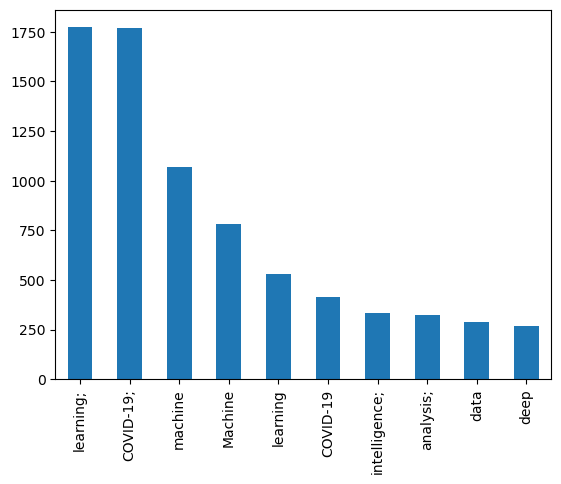

In [561]:
word_count.plot.bar(x='words', y='word_count')

Count the number of articles that were published in each year

In [562]:
article_publication_counts = articles_df['Publication Year'].value_counts()
article_publication_counts

2021.0    2273
2022.0    1136
2020.0     649
Name: Publication Year, dtype: int64

How many articles is published over years?

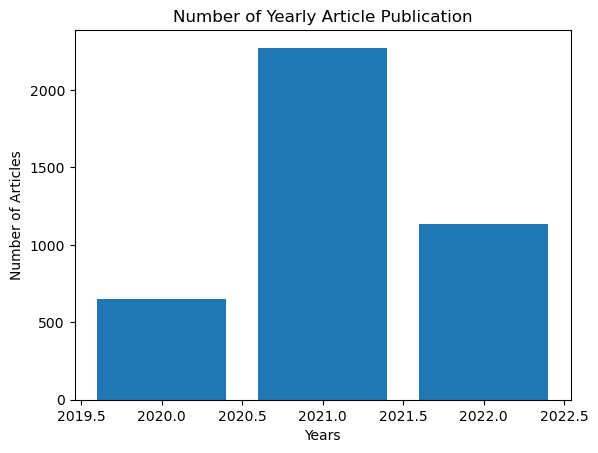

In [563]:
plt.bar(article_publication_counts.index, article_publication_counts.values)
plt.xlabel('Years')
plt.ylabel('Number of Articles')
plt.title('Number of Yearly Article Publication')
plt.show()
#from covid issue it started around 2020 

Visualize the number of published articles daily over years

(-0.5, 1599.5, 799.5, -0.5)

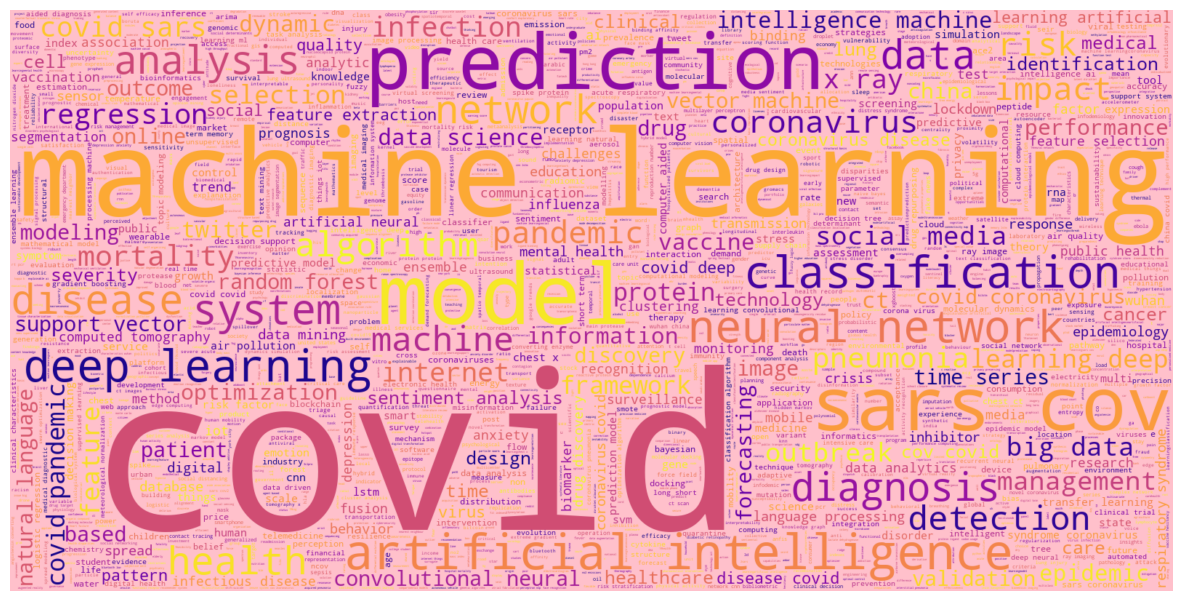

In [564]:
#To build a wordcloud, we have to remove NULL values first:
aff_withoutna= (articles_df['Author Keywords']+articles_df['Keywords Plus']).fillna(value="")
#aff_withoutna= scopus['Source title'].fillna(value="")
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(aff_withoutna.str.lower())
#Plot:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="pink", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

Which research area has mostly appeared in the dataset?

In [565]:
#I couldn't use the Research Area column in articles_df, hence, I had to use 'WoS Categories' column because it contains words that can be searched
#to disintegrate each row of 'WoS Categories' and used as Research Area
articles_df['Research Area'] = articles_df['WoS Categories'].str.split(';', expand=True)[0]

# to get the count values of research areas
most_searched = articles_df['Research Area'].value_counts()

# to get the most searched area
most_searched_area = most_searched.index[0]

print(f"The most researched area is {most_searched_area}.")

The most researched area is Computer Science, Artificial Intelligence.


Computer Science, Artificial Intelligence    468
Computer Science, Information Systems        461
Multidisciplinary Sciences                   298
Health Care Sciences & Services              192
Medicine, General & Internal                 152
Name: Research Area, dtype: int64


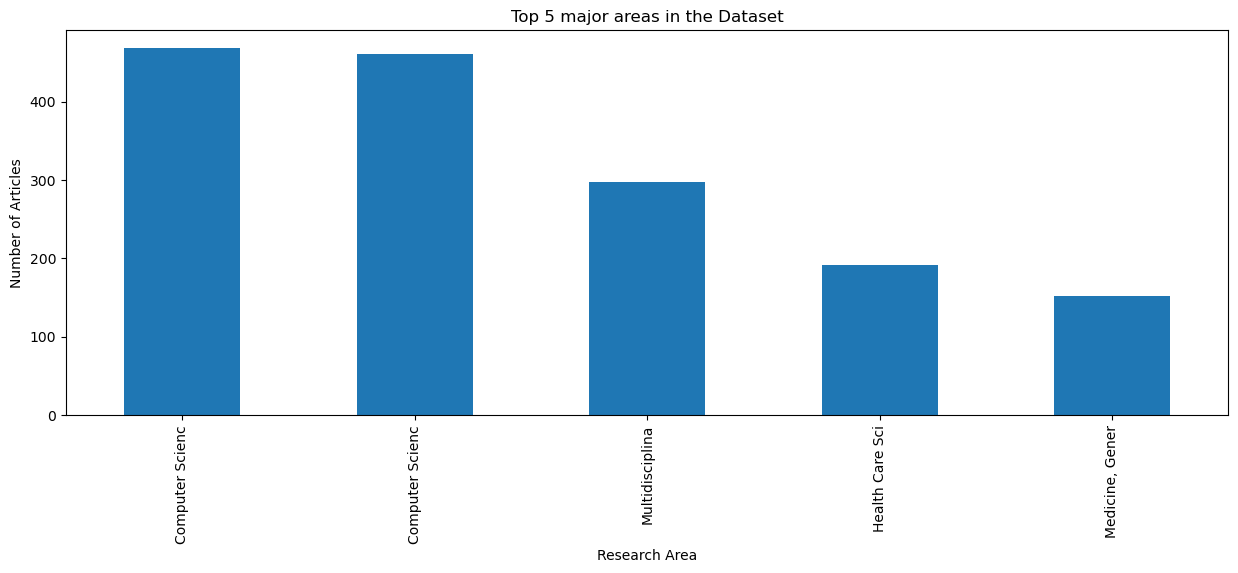

In [566]:
plt.figure(figsize=(15,5))
major_areas = articles_df['Research Area'].value_counts().nlargest(5)
ax = major_areas.plot(kind='bar')
ax.set_xticklabels([''.join(w[:15]) for w in major_areas.index])
plt.xlabel('Research Area')
plt.ylabel('Number of Articles')
plt.title('Top 5 major areas in the Dataset')

print(major_areas)
plt.show()

In which WOS categories were the most publishing done?

In [567]:
most=[]
for val,index in zip(articles_df['Source Title'].value_counts(),articles_df['Source Title'].value_counts().index):
    if val>1:
        most.append(articles_df[articles_df['Source Title']==index].index)
ind, *_ =most
articles_df.loc[ind[0], 'WoS Categories']

3                           Multidisciplinary Sciences
3    Environmental Sciences; Public, Environmental ...
3    Biochemical Research Methods; Mathematical & C...
3    Green & Sustainable Science & Technology; Envi...
3                                Engineering, Chemical
Name: WoS Categories, dtype: object

# STEP 8: Deal with the textual data Convert important textual data to numerical form.

In [568]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basqu

True

In [569]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
x = v.fit_transform(all_info['Author Keywords'].apply(lambda x: np.str_(x)))

print(x)

  (0, 4330)	0.19763216096841676
  (0, 1253)	0.16294251040910124
  (0, 222)	0.21699830757979716
  (0, 5015)	0.23935941533782532
  (0, 3075)	0.18077363149058187
  (0, 4125)	0.31221287318870067
  (0, 2441)	0.3239708117458766
  (0, 4756)	0.30387048301936764
  (0, 4145)	0.3239708117458766
  (0, 2267)	0.3239708117458766
  (0, 2615)	0.3239708117458766
  (0, 1067)	0.2921125444621917
  (0, 1891)	0.2720122157356828
  (0, 20)	0.11926392845347399
  (0, 1154)	0.11892939647881742
  (1, 1018)	0.23949942893968515
  (1, 5074)	0.3301146269485011
  (1, 3042)	0.22118012138051724
  (1, 4843)	0.2723825422589969
  (1, 574)	0.22808606102598453
  (1, 1425)	0.20563801212809502
  (1, 1113)	0.18792192481199252
  (1, 4330)	0.21470090297304972
  (1, 1253)	0.7080609541707193
  (1, 20)	0.12956430272078098
  :	:
  (52291, 3199)	1.0
  (52292, 3199)	1.0
  (52293, 3199)	1.0
  (52294, 3199)	1.0
  (52295, 3199)	1.0
  (52296, 3199)	1.0
  (52297, 3199)	1.0
  (52298, 3199)	1.0
  (52299, 3199)	1.0
  (52300, 3199)	1.0
  (52301,

# STEP 9: Finally, get a single data frame that contains only numerical values

In [570]:
all_info =all_info[['Title', 'SJR Best Quartile', 'Rating', 'Times Cited, All Databases','Total Refs.','Total Cites (3years)',
                     'Cites / Doc. (2years)', 'Publication Year']]
all_info.head()

,Title,SJR Best Quartile,Rating,"Times Cited, All Databases","Times Cited, All Databases",Total Refs.,Total Cites (3years),Cites / Doc. (2years),Publication Year
0,COVID-19 Pandemic and Financial Contagion,NaN,NaN,13.0,13.0,NaN,NaN,NaN,2020.0
1,Temporal Data Analytics on COVID-19 Data with ...,NaN,NaN,5.0,5.0,NaN,NaN,NaN,2020.0
2,Mgini - Improved Decision Tree using Minority ...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2021.0
3,Machine learning-based optimization of pre-sym...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2022.0
4,Using different machine learning models to cla...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2022.0
